In [1]:
!pip install --user tensorflow==2.15.0
!pip install --user scikit-learn
!pip install --user pandas
!pip install --user numpy
!pip install --user seaborn
!pip install --user matplotlib
!pip install --user wordcloud
!pip install --user nltk


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [3]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import pickle
import nltk
import re
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
train_data=pd.read_csv("D:\data.txt", header=None, sep=';', names=['Comment','Emotion'], encoding='utf-8')

In [5]:
train_data

,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [6]:
train_data.shape

(16000, 2)

In [7]:
train_data['Length']=[len(x) for x in train_data['Comment']]

In [8]:
train_data

,Comment,Emotion,Length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [9]:
train_data.isnull().sum()

Comment    0
Emotion    0
Length     0
dtype: int64

In [10]:
train_data.duplicated().sum()

1

In [11]:
train_data.drop_duplicates(inplace=True)

In [12]:
train_data.duplicated().sum()

0

In [13]:
train_data

,Comment,Emotion,Length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [14]:
train_data.shape

(15999, 3)

In [15]:
train_data['Emotion']

0        sadness
1        sadness
2          anger
3           love
4          anger
          ...   
15995    sadness
15996    sadness
15997        joy
15998      anger
15999    sadness
Name: Emotion, Length: 15999, dtype: object

In [16]:
train_data['Emotion'].value_counts()

Emotion
joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

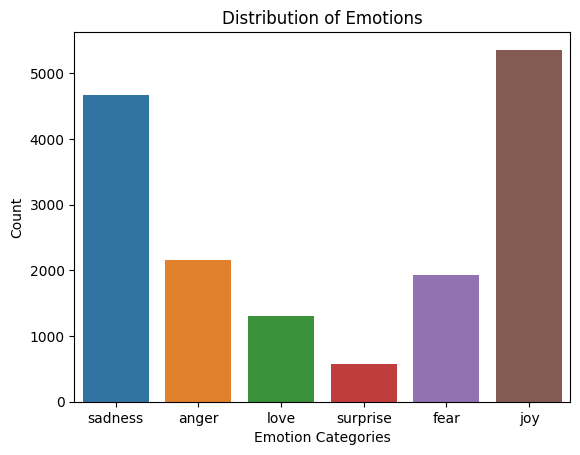

In [17]:
sns.countplot(x='Emotion', data=train_data)

plt.title('Distribution of Emotions')
plt.xlabel('Emotion Categories')
plt.ylabel('Count')

plt.show()

In [18]:
train_data_copy=train_data.copy()
length_values=train_data_copy['Length'].values
length_values

array([ 23, 108,  48, ...,  30,  59,  62], dtype=int64)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


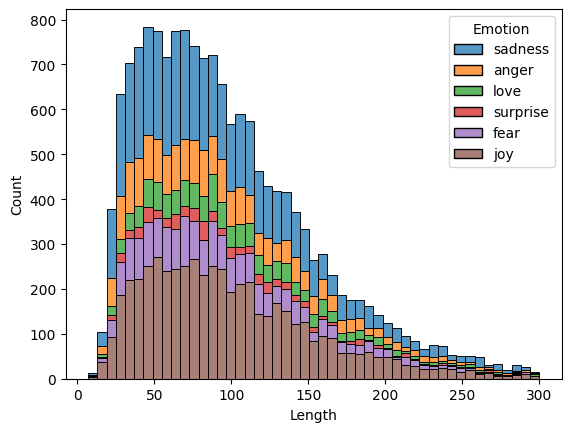

In [19]:
sns.histplot(data=train_data_copy, x='Length', hue='Emotion', multiple='stack')
plt.show()

In [20]:
emotions_list=train_data['Emotion'].unique()
emotions_list

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

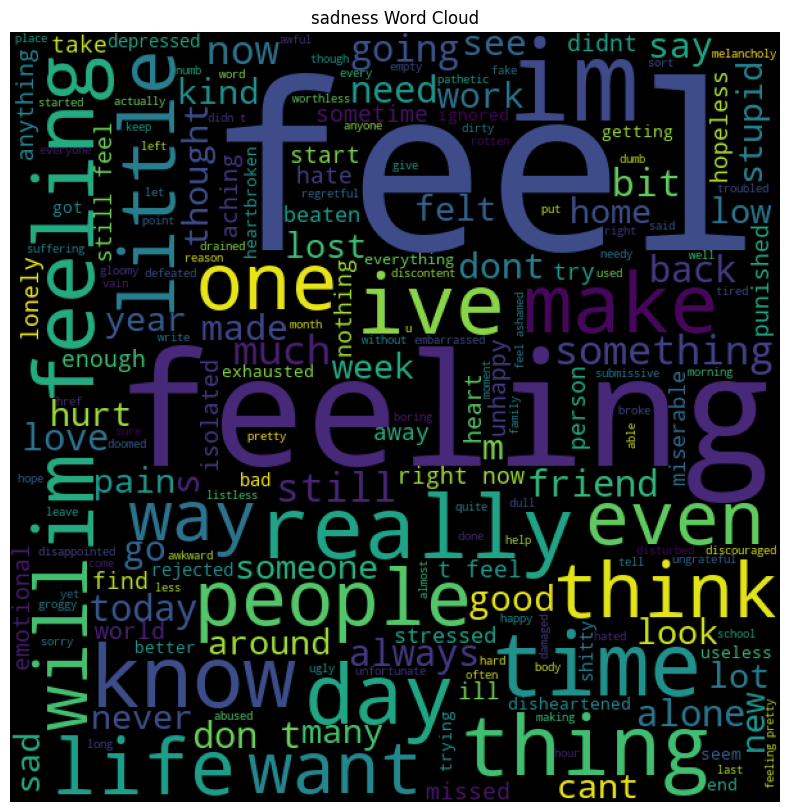

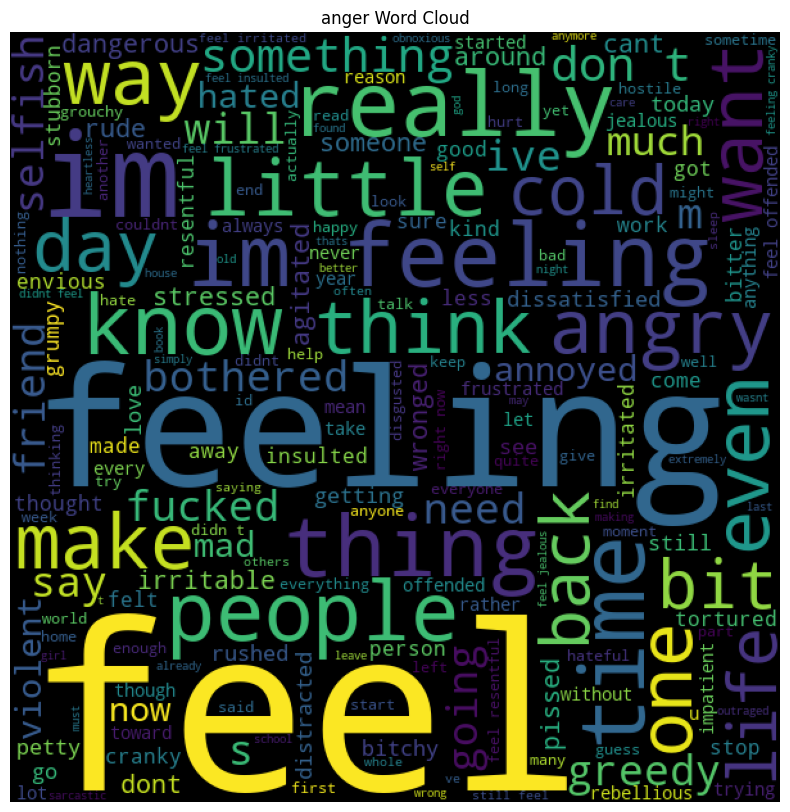

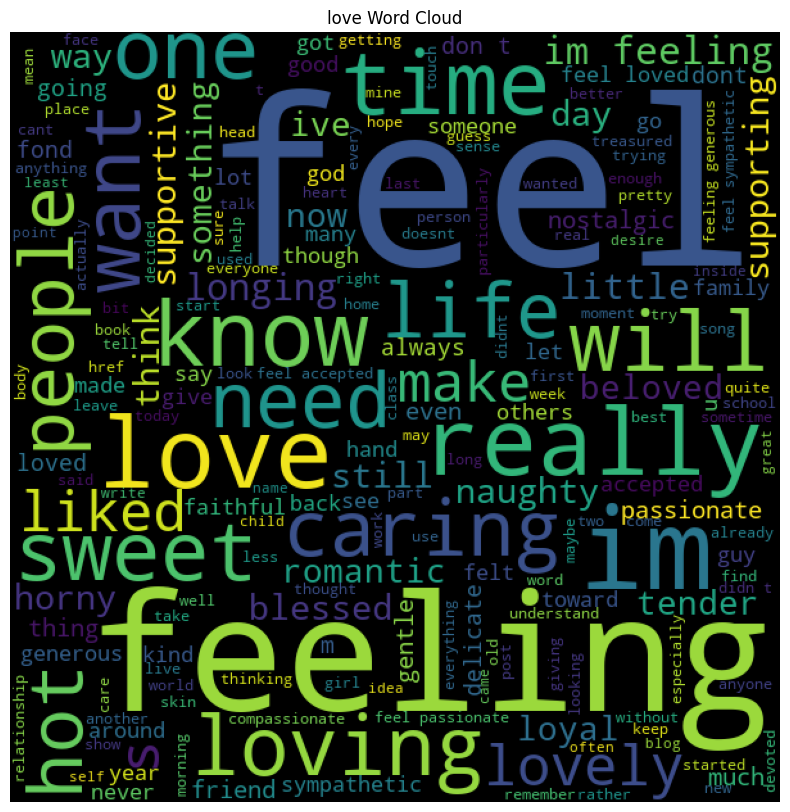

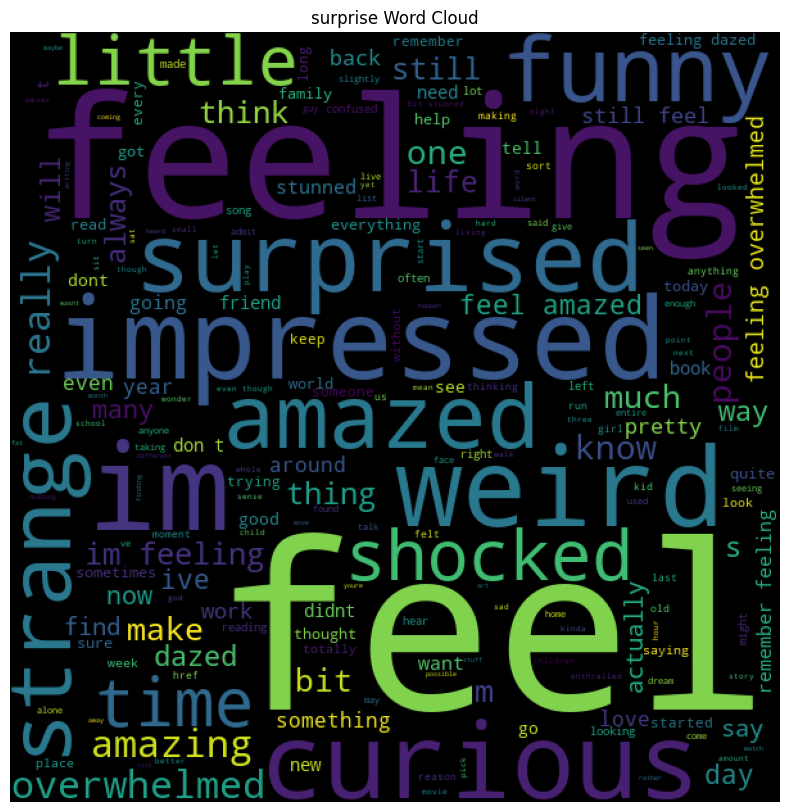

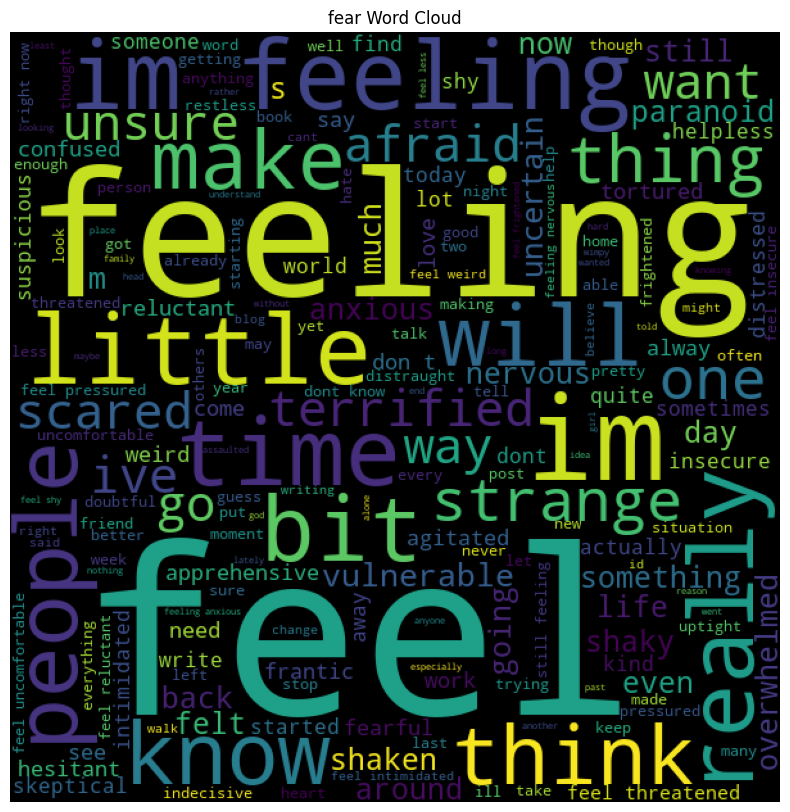

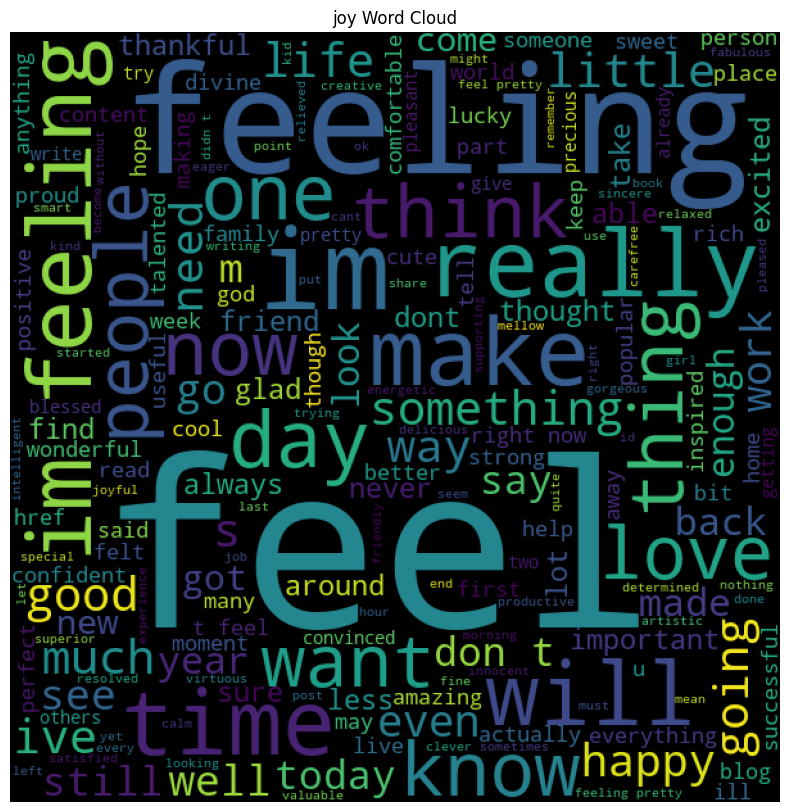

In [21]:
def words_cloud(word_cloud, emotion):
    plt.figure(figsize=(10,10))
    plt.title(emotion+" Word Cloud")
    plt.imshow(word_cloud)
    plt.axis("off")

for emotion in emotions_list:
    text=" ".join([sentence for sentence in train_data.loc[train_data['Emotion']==emotion,'Comment']])
    word_cloud=WordCloud(width=600, height=600).generate(text)
    words_cloud(word_cloud, emotion)

In [22]:
lb=LabelEncoder()
train_data['Emotion_Label']=lb.fit_transform(train_data['Emotion'])

In [23]:
train_data

,Comment,Emotion,Length,Emotion_Label
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [25]:
df=train_data.copy()

In [26]:
df

,Comment,Emotion,Length,Emotion_Label
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


In [27]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stopwords_set = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
stopwords_set
len(stopwords_set)

179

In [29]:
def clean_text(text):
    stemmer=PorterStemmer()
    text=text.lower()
    text=re.sub("[^a-z]"," ",text)
    text=text.split()
    text=[stemmer.stem(word) for word in text if word not in stopwords_set]
    return " ".join(text)

In [30]:
clean_text("I am living lovely loved life")

'live love love life'

In [31]:
df['Processed_Comment']=df['Comment'].apply(clean_text)

In [32]:
df

,Comment,Emotion,Length,Emotion_Label,Processed_Comment
0,i didnt feel humiliated,sadness,23,4,didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,108,4,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,anger,48,0,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,love,92,3,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,anger,20,0,feel grouchi
...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4,brief time beanbag said anna feel like beaten
15996,i am now turning and i feel pathetic that i am...,sadness,102,4,turn feel pathet still wait tabl sub teach degre
15997,i feel strong and good overall,joy,30,2,feel strong good overal
15998,i feel like this was such a rude comment and i...,anger,59,0,feel like rude comment im glad


In [33]:
x_train, x_test, y_train, y_test=train_test_split(df['Processed_Comment'], df['Emotion_Label'], test_size=0.2, random_state=42)

In [34]:
x_train

676      refer cours though cant help feel somehow iron...
14180           would feel awkward someon tell feel toward
7077     feel like probabl would like book littl bit si...
13004    ive slow take time listen child moment feel li...
10264                         feel vital rlsh gimmick need
                               ...                        
13418         love leav reader feel confus slightli deceiv
5390                                            feel delic
860                                start feel littl stress
15796      feel accept music critic reinforc concept music
7270             feel someon rude wrongli done someth lose
Name: Processed_Comment, Length: 12799, dtype: object

In [44]:
tfidf_vectorizer=TfidfVectorizer()
x_train_tfidf=tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf=tfidf_vectorizer.transform(x_test)

In [45]:
classifiers={
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

for name, classifier in classifiers.items():
    print(f"\n***************{name}*******************")
    classifier.fit(x_train_tfidf,y_train)
    y_pred_tfidf=classifier.predict(x_test_tfidf)
    accuracy_tfidf=accuracy_score(y_test,y_pred_tfidf)
    print(f"\nAccuracy: {accuracy_tfidf}")
    print(classification_report(y_test,y_pred_tfidf))


***************Multinomial Naive Bayes*******************

Accuracy: 0.6590625
              precision    recall  f1-score   support

           0       0.95      0.32      0.48       439
           1       0.88      0.23      0.37       375
           2       0.58      0.98      0.73      1027
           3       1.00      0.03      0.05       303
           4       0.72      0.91      0.80       950
           5       1.00      0.02      0.04       106

    accuracy                           0.66      3200
   macro avg       0.85      0.42      0.41      3200
weighted avg       0.76      0.66      0.59      3200


***************Logistic Regression*******************


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy: 0.8240625
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       439
           1       0.85      0.72      0.78       375
           2       0.76      0.94      0.84      1027
           3       0.83      0.46      0.59       303
           4       0.88      0.92      0.90       950
           5       0.74      0.46      0.57       106

    accuracy                           0.82      3200
   macro avg       0.82      0.71      0.75      3200
weighted avg       0.83      0.82      0.82      3200


***************Random Forest*******************

Accuracy: 0.84375
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       439
           1       0.82      0.85      0.84       375
           2       0.83      0.89      0.86      1027
           3       0.80      0.59      0.68       303
           4       0.91      0.88      0.90       950
           5       0.70      0.68      0.69

In [46]:
lg=LogisticRegression()
lg.fit(x_train_tfidf,y_train)
y_pred_lg=lg.predict(x_test_tfidf)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
def predict_emotion(input_text):
    cleaned_text=clean_text(input_text)
    input_vector=tfidf_vectorizer.transform([cleaned_text])
    predicted_label=lg.predict(input_vector)[0]
    predicted_emotion=lb.inverse_transform([predicted_label])[0]
    label=np.max(predicted_label)
    return predicted_emotion,label

sentences=["I didnt feel humiliated", 
           "I feel strong and good overall"]

for sentence in sentences:
    print(sentence)
    emo, label=predict_emotion(sentence)
    print("Predicted Emotion: ",emo)
    print("Predicted Label: ",label)
    print("**********************")

I didnt feel humiliated
Predicted Emotion:  sadness
Predicted Label:  4
**********************
I feel strong and good overall
Predicted Emotion:  joy
Predicted Label:  2
**********************


In [54]:
import pickle
pickle.dump(lg,open("logistic_regression.pkl",'wb'))
pickle.dump(lb,open("label_encoder.pkl",'wb'))
pickle.dump(tfidf_vectorizer,open("tfidf_vectorizer.pkl",'wb'))

In [56]:
train_data

,Comment,Emotion,Length,Emotion_Label
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


In [57]:
max([len(w) for w in train_data['Comment']])

300

In [68]:
def clean_text(df, column,vocab_size, max_len):
    stemmer=PorterStemmer()
    corpus=[]
    for text in df[column]:
        text=re.sub("[^a-zA-Z]",' ',text)
        text=text.lower()
        text=text.split()
        text=[stemmer.stem(w) for w in text if w not in stopwords_set]
        text=" ".join(text)
        corpus.append(text)
    one_hot_word=[one_hot(input_text=word, n=vocab_size) for word in corpus]
    pad=pad_sequences(sequences=one_hot_word, maxlen=max_len, padding='pre')
    return pad

x_train=clean_text(train_data,'Comment',vocab_size=11000,max_len=300)

In [69]:
x_train

array([[   0,    0,    0, ..., 2021,  720, 1512],
       [   0,    0,    0, ..., 3307, 4346, 9814],
       [   0,    0,    0, ...,  720, 3333,  680],
       ...,
       [   0,    0,    0, ..., 2031, 3338, 4394],
       [   0,    0,    0, ..., 6070, 4387, 8509],
       [   0,    0,    0, ...,  720, 4350,  895]])

In [72]:
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)

x_train shape:  (15999, 300)
y_train shape:  (15999, 6)


In [65]:
y_train=to_categorical(train_data['Emotion_Label'])
y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [73]:
model=Sequential()
model.add(Embedding(input_dim=11000,output_dim=150,input_length=300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10, batch_size=64, verbose=1)


Epoch 1/10


250/250 [==============================] - 136s 511ms/step - loss: 1.4532 - accuracy: 0.4311
Epoch 2/10
250/250 [==============================] - 127s 509ms/step - loss: 0.8973 - accuracy: 0.6961
Epoch 3/10
250/250 [==============================] - 1829s 7s/step - loss: 0.5110 - accuracy: 0.8280
Epoch 4/10
250/250 [==============================] - 127s 507ms/step - loss: 0.3204 - accuracy: 0.8939
Epoch 5/10
250/250 [==============================] - 127s 506ms/step - loss: 0.2244 - accuracy: 0.9276
Epoch 6/10
250/250 [==============================] - 127s 507ms/step - loss: 0.1817 - accuracy: 0.9395
Epoch 7/10
250/250 [==============================] - 127s 510ms/step - loss: 0.1464 - accuracy: 0.9514
Epoch 8/10
250/250 [==============================] - 127s 510ms/step - loss: 0.1215 - accuracy: 0.9591
Epoch 9/10
250/250 [==============================] - 128s 513ms/step - loss: 0.1099 - accuracy: 0.9631
Epoch 10/10
250/250 [==============================] - 129s 515

In [76]:
def pred(text):
    stemmer=PorterStemmer()
    corpus=[]
    text=re.sub("[^a-zA-Z]",' ',text)
    text=text.lower()
    text=text.split()
    text=[stemmer.stem(w) for w in text if w not in stopwords_set]
    text=" ".join(text)
    corpus.append(text)
    one_hot_word=[one_hot(input_text=word, n=11000) for word in corpus]
    pad=pad_sequences(sequences=one_hot_word, maxlen=300, padding='pre')
    return pad

for sentence in sentences:
    print(sentence)
    clean_sent=pred(sentence)
    emotion=lb.inverse_transform(np.argmax(model.predict(clean_sent),axis=-1))[0]
    label=np.argmax(model.predict(clean_sent))
    print("Predicted Emotion: ",emotion)
    print("Predicted Label: ",label)
    print("**********************")

I didnt feel humiliated
1/1 [==============================] - 0s 75ms/step
Predicted Emotion:  sadness
Predicted Label:  4
**********************
I feel strong and good overall
1/1 [==============================] - 0s 79ms/step
Predicted Emotion:  joy
Predicted Label:  2
**********************


In [77]:
model.save('model.h5')

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
